# **Title**: Health Insurance Cross Sell



---

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

---

dataset is obtained from Kaggle in this [Link](https://www.kaggle.com/datasets/anmolkumar/health-insurance-cross-sell-prediction?select=train.csv)


## **Section 1**  Problem statement
* Type: **Supervised binay-class classification**
* Output: **Response of insurance (0 or 1)**
* Features: 

 * id	(int)
 * Gender	(str)
 * Age	(int)
 * Driving_License	(int)
 * Region_Code (float)
 * Previously_Insured (int)
 * Vehicle_Age (str)
 * Vehicle_Damage	1 (str)
 * Annual_Premium	(float)
 * Policy_Sales_Channel	(float) 
 * Vintage (int)

* The last column of the dataset indicates the response of the insurance to be either approved or rejected.
* number of samples: **381109** 
* [more info](https://www.kaggle.com/datasets/anmolkumar/health-insurance-cross-sell-prediction?select=train.csv)

## **Section 2**  Python requirements

```
Required pachages: numpy, seaborn, matplotlib, pandas, scikit-learn
```

>Importing the installed packages

* Pandas is a useful library in data handling.
* Numpy library used for working with arrays.
* Seaborn/Matplotlib are used for data visualisation purpose.
* Sklearn – This module contains multiple libraries having pre-implemented functions to perform tasks from data preprocessing to model development and evaluation.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## **Section 3**:  Data Analysis

* Load the dataset
* Exploring data (optional for model development run)

In [ ]:
# Load dataset
url = 'https://raw.githubusercontent.com/datu-ca/ML/main/datasets/classification/health_insurance/train.csv?token=GHSAT0AAAAAAB4SCUVR4VWD5IGEHXAW6LWYY7FZDDQ'
df  =pd.read_csv(url)
print(df.head())

   id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0   1    Male   44                1         28.0                   0   
1   2    Male   76                1          3.0                   0   
2   3    Male   47                1         28.0                   0   
3   4    Male   21                1         11.0                   1   
4   5  Female   29                1         41.0                   1   

  Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  \
0   > 2 Years            Yes         40454.0                  26.0      217   
1    1-2 Year             No         33536.0                  26.0      183   
2   > 2 Years            Yes         38294.0                  26.0       27   
3    < 1 Year             No         28619.0                 152.0      203   
4    < 1 Year             No         27496.0                 152.0       39   

   Response  
0         1  
1         0  
2         1  
3         0  
4         0  


### Data analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,381109.0,190555.000000,110016.836208,1.0,95278.0,190555.0,285832.0,381109.0
Age,381109.0,38.822584,15.511611,20.0,25.0,36.0,49.0,85.0
Driving_License,381109.0,0.997869,0.046110,0.0,1.0,1.0,1.0,1.0
Region_Code,381109.0,26.388807,13.229888,0.0,15.0,28.0,35.0,52.0
Previously_Insured,381109.0,0.458210,0.498251,0.0,0.0,0.0,1.0,1.0
Annual_Premium,381109.0,30564.389581,17213.155057,2630.0,24405.0,31669.0,39400.0,540165.0
Policy_Sales_Channel,381109.0,112.034295,54.203995,1.0,29.0,133.0,152.0,163.0
Vintage,381109.0,154.347397,83.671304,10.0,82.0,154.0,227.0,299.0
Response,381109.0,0.122563,0.327936,0.0,0.0,0.0,0.0,1.0


In [ ]:
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [ ]:
# Convert categorical variables to Indicator columns
df2 = pd.get_dummies(df,drop_first=True)
df2.head()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Male,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
0,1,44,1,28.0,0,40454.0,26.0,217,1,1,0,1,1
1,2,76,1,3.0,0,33536.0,26.0,183,0,1,0,0,0
2,3,47,1,28.0,0,38294.0,26.0,27,1,1,0,1,1
3,4,21,1,11.0,1,28619.0,152.0,203,0,1,1,0,0
4,5,29,1,41.0,1,27496.0,152.0,39,0,0,1,0,0


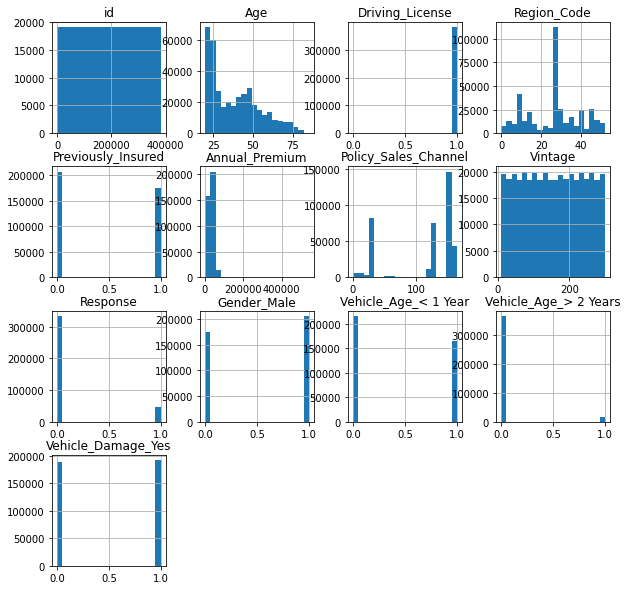

In [ ]:
df2.hist(bins=20, figsize=(10, 10))
plt.show()

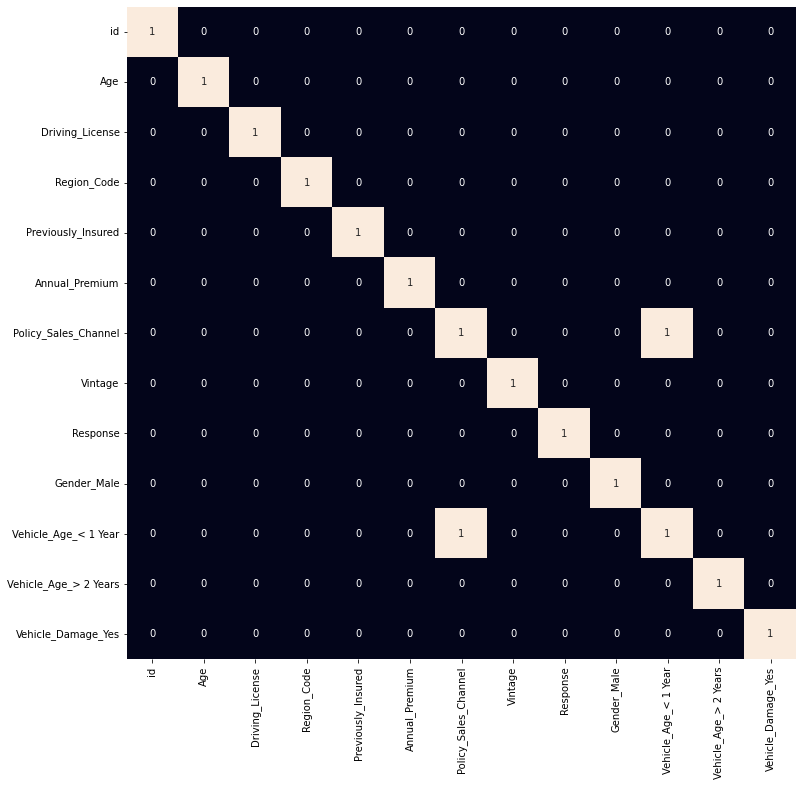

In [ ]:
plt.figure(figsize=(12, 12))
sns.heatmap(df2.corr() > 0.75, annot=True, cbar=False)
plt.show()

## **Section 4**:  Modeling

* Split the train/test/validation
* Consdier the classification models:
>  Logistic Regression (LR)

In [ ]:

X = df2.iloc[:,[1,2,3,4,5,6,7,9,10,11,12]]
y = df2.iloc[:,8]

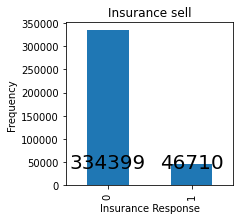

In [ ]:
y.value_counts().plot(kind='bar',figsize=(3,3),title="Insurance sell")
plt.xlabel("Insurance Response")
plt.ylabel("Frequency")
y_pos=50000
x_pos=0
for i, v in enumerate(y.value_counts()):
    plt.text(i+x_pos, y_pos, v, horizontalalignment='center',      verticalalignment='center', fontsize=20)
plt.show()

In [ ]:
# define standard scaler
scaler = StandardScaler()
X= pd.DataFrame(scaler.fit_transform(X))

In [ ]:
# Splitting dataset into training and test
X_train, X_test, y_train, y_test=  train_test_split(X,y,test_size=0.2)

**Accuracy Paradox for Imbalanced dataset**

In [ ]:
#  logistics regression
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred=clf.predict(X_test)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


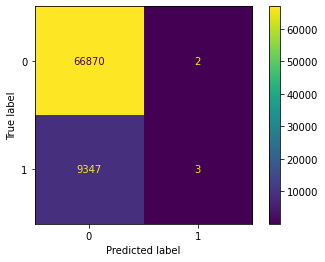

In [ ]:
# Plotting the Confusion Matrix
plot_confusion_matrix(clf,X_test, y_test)

In [ ]:
print("Accuracy",accuracy_score(y_test, y_pred))
print("Precision", precision_score(y_test, y_pred))
print("Recall",recall_score(y_test, y_pred))
print("F1 score",f1_score(y_test, y_pred))

Accuracy 0.8773451234551705
Precision 0.6
Recall 0.00032085561497326203
F1 score 0.0006413682522715125


relatively good accuracy, recall and F1-score are very bad. >> Accuracy paradox

### Applying Cost-Sensitive Training

In [ ]:
clf_cw = LogisticRegression(random_state=0, class_weight='balanced').fit(X_train, y_train)
y_pred= clf_cw.predict(X_test)
print("Accuracy",accuracy_score(y_test, y_pred))
print("Precision", precision_score(y_test, y_pred))
print("Recall",recall_score(y_test, y_pred))
print("F1 score",f1_score(y_test, y_pred))

Accuracy 0.6397759177140458
Precision 0.2507227621905889
Recall 0.973903743315508
F1 score 0.398782543957608


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


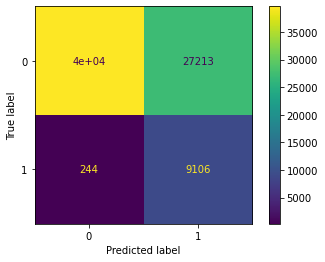

In [ ]:
plot_confusion_matrix(clf_cw, X_test, y_test)

### Applying Random Under Sampling

![Down dampling](https://miro.medium.com/v2/resize:fit:640/format:webp/1*XKRBj_RXtOMhhd5xgvdd0g.png)


In [ ]:
# pip install imblearn
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
# Create an instance of RandomUnderSampler, fit the training data #and apply Logistics regression
rus= RandomUnderSampler()
X_train, y_train = rus.fit_resample(X_train, y_train)
clf_rus=  LogisticRegression(random_state=0).fit(X_train, y_train)

In [ ]:
# predict the test data
y_pred= clf_rus.predict(X_test)
# print the model performance metrics
print("Accurcay",accuracy_score(y_test, y_pred))
print("Precision", precision_score(y_test, y_pred))
print("Recall",recall_score(y_test, y_pred))
print("F1 score",f1_score(y_test, y_pred))

Accurcay 0.6401826244391383
Precision 0.2508270842523158
Recall 0.973048128342246
F1 score 0.3988426636271974


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


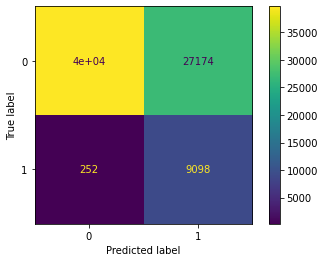

In [ ]:
plot_confusion_matrix(clf_rus, X_test, y_test)

### Applying Random Over Sampling

![Over dampling](https://miro.medium.com/v2/resize:fit:640/format:webp/1*9AeRQIvF-jvEoSDkOZdAWA.png)


In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
# Create an instance of RandomOverSampler, fit the training data #and apply Logistics regression
ros= RandomOverSampler(sampling_strategy='auto')
X_train, y_train = ros.fit_resample(X_train, y_train)
clf_ros=  LogisticRegression(random_state=0).fit(X_train, y_train)

In [ ]:
# predict the test data
y_pred= clf_ros.predict(X_test)
# print the model performance metrics
print("Accurcay",accuracy_score(y_test, y_pred))
print("Precision", precision_score(y_test, y_pred))
print("Recall",recall_score(y_test, y_pred))
print("F1 score",f1_score(y_test, y_pred))

Accurcay 0.6401826244391383
Precision 0.2508270842523158
Recall 0.973048128342246
F1 score 0.3988426636271974


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


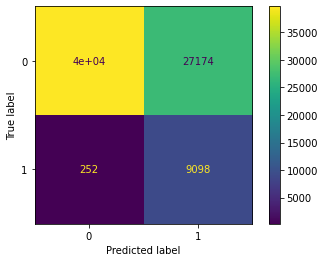

In [ ]:
plot_confusion_matrix(clf_ros, X_test, y_test)

### Applying Synthetic Minority Over-sampling Technique (SMOTE)

![SMOTE](https://miro.medium.com/v2/resize:fit:640/format:webp/1*OUWwwQsFA1GVmjW2IGM3xg.png)


In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
##Create an instance of SMOTE, fit the training data and apply #Logistics regression
sm = SMOTE(random_state=27, sampling_strategy='minority', k_neighbors=5)
X_train, y_train = sm.fit_resample(X_train, y_train)
clf_sm = LogisticRegression(random_state=0).fit(X_train, y_train)

In [ ]:
# predict the test data
y_pred= clf_sm.predict(X_test)
# print the model performance metrics
print("Accurcay",accuracy_score(y_test, y_pred))
print("Precision", precision_score(y_test, y_pred))
print("Recall",recall_score(y_test, y_pred))
print("F1 score",f1_score(y_test, y_pred))

Accurcay 0.6401826244391383
Precision 0.2508270842523158
Recall 0.973048128342246
F1 score 0.3988426636271974


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


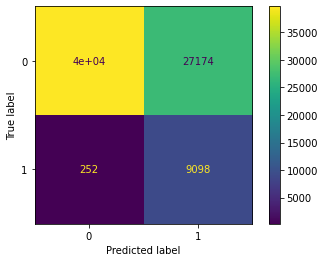

In [ ]:
plot_confusion_matrix(clf_sm, X_test, y_test)

## Section 5: Prediction
* Make prediction on the best model
* Evaluate the prediction

In [ ]:
# We create a new (fake) person having the three most correated values high
new_df = pd.DataFrame([[	45,	1,	15.0,	1,	23864.0,	153.0,	125	,1,	1	,0,	1]])

In [ ]:
# We scale those values like the others
prediction= clf_rus.predict(new_df)
print(prediction)

[1]
